In [1]:
# DATA UPLOADING

In [2]:
# IMPORT ALL THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset to take a look at its structure and contents
file_path = '/Users/suprajabekkem/Downloads/capstone/UpdatedResumeDataSet.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


# NOW LETS DO SOME EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(962, 2)

In [5]:
# HANDLING MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Category    0
Resume      0
dtype: int64


In [6]:
# CHECKING FOR DUPLICATE ROWS
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 796


In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

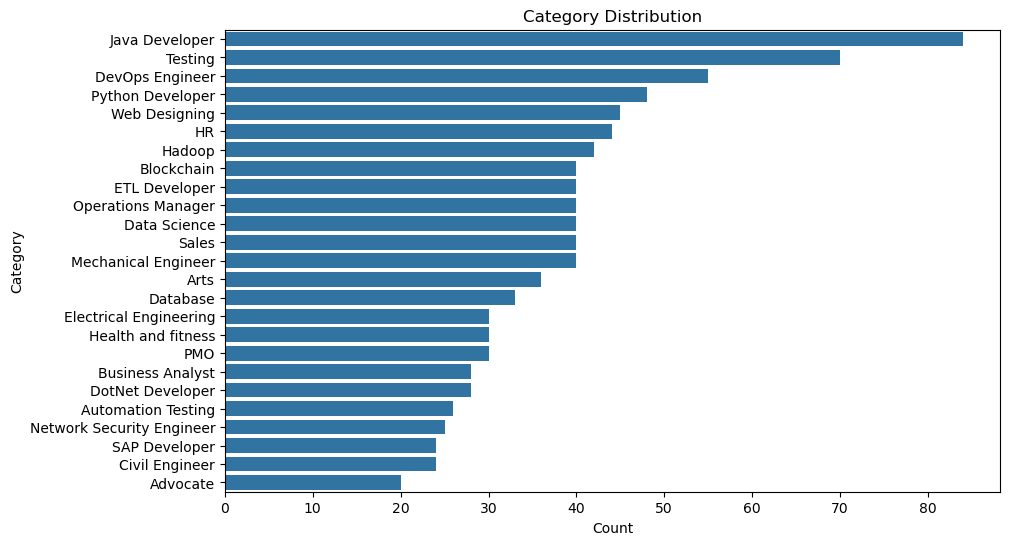

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with true labels
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Exploring Resume

In [11]:
df['Category'][0]

'Data Science'

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data:

1 URLs,
2 hashtags,
3 mentions,
4 special letters,
5 punctuations.

In [79]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet corpus for lemmatization if not already available
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text cleaning
def clean_resume_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words (convert to base form)
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the cleaned words back into a single string
    return ' '.join(words)

# Apply the cleaning function to the 'Resume' column in your DataFrame
df['cleaned_resume'] = df['Resume'].apply(clean_resume_text)

# Display the first few rows of the cleaned resumes
df[['Resume', 'cleaned_resume']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suprajabekkem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/suprajabekkem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Resume,cleaned_resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv data scientis...
2,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [81]:
# let me save this into a file for my comparision and easy understanding
output_file_path = '/Users/suprajabekkem/Downloads/cleaned_resumes.csv'
df.to_csv(output_file_path, index=False)
print(f"Cleaned resume data has been saved to: {output_file_path}")

Cleaned resume data has been saved to: /Users/suprajabekkem/Downloads/cleaned_resumes.csv


In [83]:
df['cleaned_resume'][0]

'skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core me

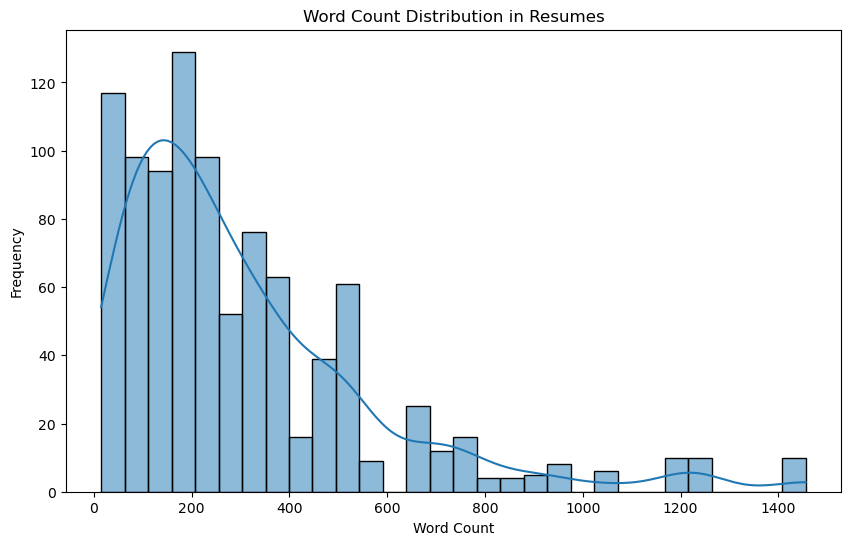

In [85]:
# Calculate word count for each resume
df['word_count'] = df['cleaned_resume'].apply(lambda x: len(x.split()))

# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution in Resumes')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [89]:
import wordcloud

from wordcloud import WordCloud

# Combine all resumes into one large string
all_words = ' '.join([text for text in df['cleaned_resume']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [18]:
# CONVERTING CATEGORICAL DATA INTO NUMERIC FORM
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
# Display the first few rows of the DataFrame
df.head(10)

,Category,Resume,cleaned_resume,word_count
0,6,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,488
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv data scientis...,118
2,6,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,180
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,715
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,49
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...,78
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill python tableau data visualization r stud...,171
7,6,Education Details \r\n B.Tech Rayat and Bahr...,education detail btech rayat bahra institute e...,795
8,6,Personal Skills â¢ Ability to quickly grasp t...,personal skill ability quickly grasp technical...,189
9,6,Expertise â Data and Quantitative Analysis â...,expertise data quantitative analysis decision ...,438


In [20]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [21]:
# LET US SPLIT THE DATA FOR TRAINING AND TESTING
from sklearn.model_selection import train_test_split

#'cleaned_resume' is the column with cleaned text and 'Category' contains the labels
X = df['cleaned_resume']  
y = df['Category'] 

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the training and test sets
print("Training feature data shape (X_train):", X_train.shape)
print("Test feature data shape (X_test):", X_test.shape)

Training feature data shape (X_train): (769,)
Test feature data shape (X_test): (193,)


In [22]:
# CONVERTING TEXT DATA INTO NUMERICAL FORM BY VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=7000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data (without fitting again)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF matrix shape for training data:", X_train_tfidf.shape)

TF-IDF matrix shape for training data: (769, 6650)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9741
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.79      1.00      0.88        15
          16       1.00      1.00      1

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN and wrap it in One-vs-Rest Classifier
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

# Train the model
knn_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9845
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.0

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9948
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9948
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.0

In [27]:
y_pred_svm

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20,  4,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [28]:
y_pred_knn

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [29]:
import pickle

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# Save KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)
# Save SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [30]:
# Load Naive Bayes model
with open('naive_bayes_model.pkl', 'rb') as f:
    nb_model_loaded = pickle.load(f)

# Load KNN model
with open('knn_model.pkl', 'rb') as f:
    knn_model_loaded = pickle.load(f)

# Load Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as f:
    logreg_model_loaded = pickle.load(f)

# Load SVM model
with open('svm_model.pkl', 'rb') as f:
    svm_model_loaded = pickle.load(f)


In [31]:
# Predict with the loaded Naive Bayes model
y_pred_nb_loaded = nb_model_loaded.predict(X_test_tfidf)
print(f"Accuracy (Naive Bayes - Loaded Model): {accuracy_score(y_test, y_pred_nb_loaded):.4f}")

# Predict with the loaded KNN model
y_pred_knn_loaded = knn_model_loaded.predict(X_test_tfidf)
print(f"Accuracy (KNN - Loaded Model): {accuracy_score(y_test, y_pred_knn_loaded):.4f}")


Accuracy (Naive Bayes - Loaded Model): 0.9741
Accuracy (KNN - Loaded Model): 0.9845


In [32]:
y_pred_nb_loaded

array([15, 15, 15, 13, 14, 17, 16,  2, 15, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8, 15, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8, 15,  2,  9, 10,  2, 23, 20, 20, 23, 15, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [33]:
y_pred_knn_loaded

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [34]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [35]:
# Load the saved TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

In [36]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [37]:
import pickle
import re

# Step 1: Define the resume cleaning function (same as used during training)
def clean_resume_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Step 2: Clean the input resume using the cleaning function
cleaned_resume = clean_resume_text(myresume)
print("Cleaned Resume:", cleaned_resume)

# Step 3: Load the saved TfidfVectorizer (used during model training)
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Step 4: Transform the cleaned resume using the loaded TfidfVectorizer
input_features = tfidf_vectorizer.transform([cleaned_resume])

# Step 5: Load the trained classifier model (you can switch between models like KNN, Logistic Regression, Naive Bayes, etc.)
with open('knn_model.pkl', 'rb') as f:  
    clf = pickle.load(f)

# Step 6: Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Step 7: Define the mapping of category IDs to category names
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

# Step 8: Map the predicted category ID to the corresponding category name
category_name = category_mapping.get(prediction_id, "Unknown")

# Step 9: Output the predicted category and its corresponding ID
print("Predicted Category:", category_name)
print("Category ID:", prediction_id)


Cleaned Resume: i am a data scientist specializing in machine learning deep learning and computer vision with a strong background in mathematics statistics and programming i am passionate about uncovering hidden patterns and insights in data i have extensive experience in developing predictive models implementing deep learning algorithms and designing computer vision systems my technical skills include proficiency in python sklearn tensorflow and pytorch what sets me apart is my ability to effectively communicate complex concepts to diverse audiences i excel in translating technical insights into actionable recommendations that drive informed decisionmaking if youre looking for a dedicated and versatile data scientist to collaborate on impactful projects i am eager to contribute my expertise lets harness the power of data together to unlock new possibilities and shape a better future contact sources email noorsaeedgmailcom phone github httpsgithubcomnoorsaeed linkdin httpswwwlinkedinco